# Correlation analysis on samples

In this example we are going to estimate the correlation between an output sample Y and the corresponding inputs using various estimators:

- Pearson coefficients
- Spearman coefficients
- PCC: Partial Correlation Coefficients
- PRCC: Partial Rank Correlation Coefficient
- SRC: Standard Regression Coefficients
- SRRC: Standard Rank Regression Coefficient

In [1]:
from __future__ import print_function
import openturns as ot

To illustrate the usage of the method mentionned above, we define a set of X/Y data using the ususal `Ishigami` use-case.

In [2]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
formula = ['X3+sin(pi_*X1)+7*sin(X2)*sin(pi_*X2)+' + \
           '1.2*((pi_*X3)*(pi_*X2))*sin(pi_*X1)']
input_names = ['X1', 'X2', 'X3']
model = ot.SymbolicFunction(input_names, formula)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0)] * 3, \
                                        ot.IndependentCopula(3))
size = 100
inputDesign = ot.SobolIndicesExperiment(distribution, size, True).generate()
outputDesign = model(inputDesign)

PCC coefficients
------------------
We compute here `PCC` coefficients using the `CorrelationAnalysis`

In [3]:
pcc_indices = ot.CorrelationAnalysis.PCC(inputDesign, outputDesign)
print(pcc_indices)

[0.195052,0.0183082,0.171376]


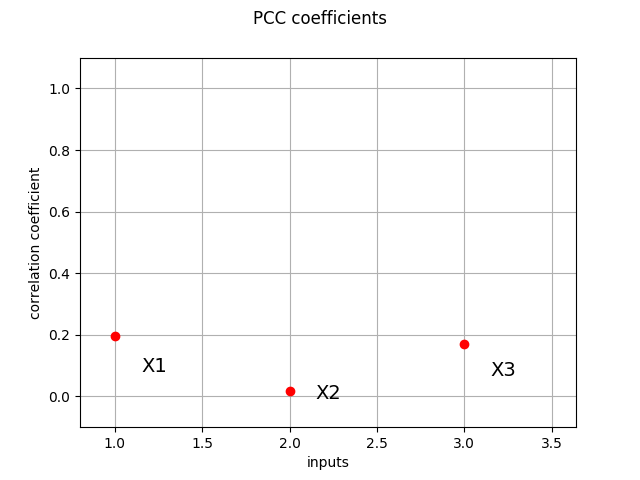

In [4]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(pcc_indices, input_names, "PCC coefficients")

PRCC coefficients
--------------------
We compute here `PRCC` coefficients using the `CorrelationAnalysis`

In [5]:
prcc_indices = ot.CorrelationAnalysis.PRCC(inputDesign, outputDesign)
print(prcc_indices)

[0.218657,0.00540221,0.14355]


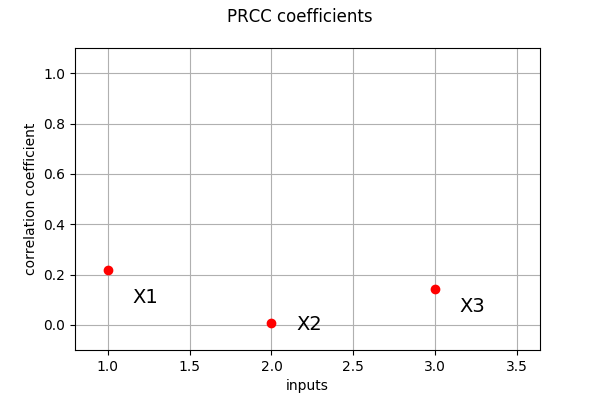

In [6]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(prcc_indices, input_names, "PRCC coefficients")

SRC coefficients
-------------------
We compute here `SRC` coefficients using the `CorrelationAnalysis`

In [7]:
src_indices = ot.CorrelationAnalysis.SRC(inputDesign, outputDesign)
print(src_indices)

[0.0369391,0.000313641,0.0282987]


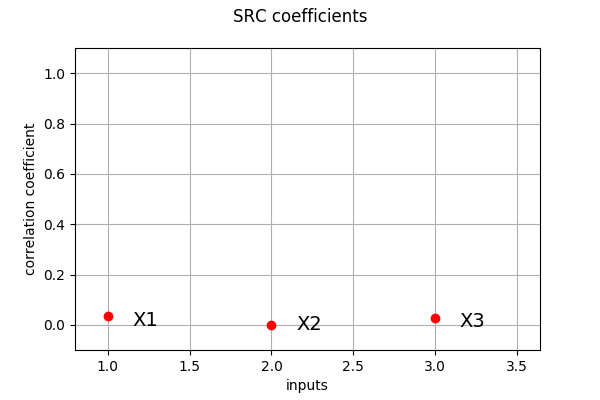

In [8]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(src_indices, input_names, 'SRC coefficients')

Case where coefficients sum to 1 : 

In [9]:
scale_src_indices = ot.CorrelationAnalysis.SRC(inputDesign, outputDesign, True)
print(scale_src_indices)

[0.563513,0.00478466,0.431703]


And its associated graph:

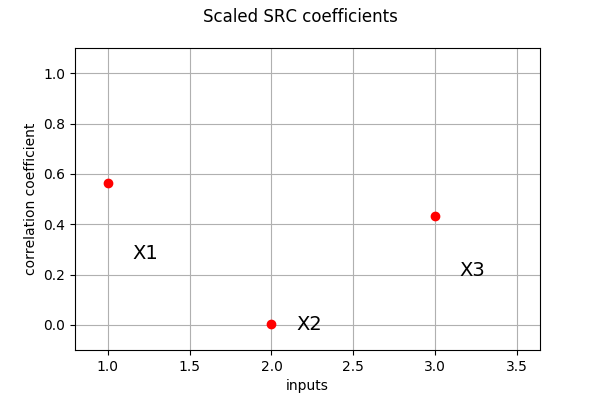

In [10]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(scale_src_indices, input_names, 'Scaled SRC coefficients')

Finally, using signed src: we get the trend importance :

In [11]:
signed_src_indices = ot.CorrelationAnalysis.SignedSRC(inputDesign, outputDesign)
print(signed_src_indices)

[0.192195,0.0177099,0.168222]


and its graph :

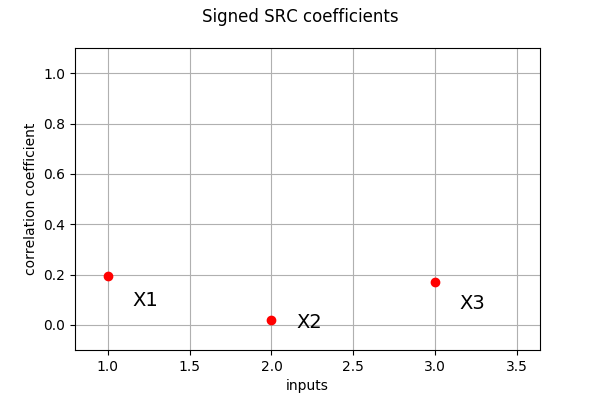

In [12]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(signed_src_indices, input_names, 'Signed SRC coefficients')

SRRC coefficients
--------------------
We compute here `SRRC` coefficients using the `CorrelationAnalysis`

In [13]:
srrc_indices = ot.CorrelationAnalysis.SRRC(inputDesign, outputDesign)
print(srrc_indices)

[0.0468524,2.72779e-05,0.0196627]


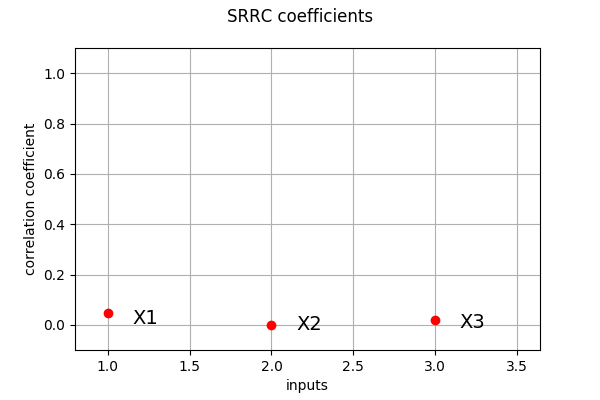

In [14]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(srrc_indices, input_names, 'SRRC coefficients')

Pearson coefficients
-----------------------
We compute here the Pearson $\rho$ coefficients using the `CorrelationAnalysis`

In [15]:
pearson_correlation = ot.CorrelationAnalysis.PearsonCorrelation(inputDesign, outputDesign)
print(pearson_correlation)

[0.194078,0.0210564,0.171476]


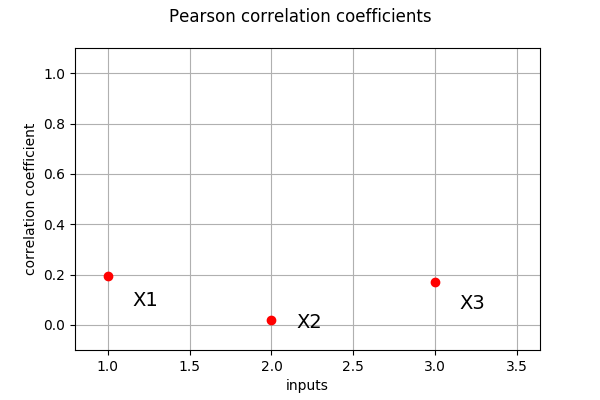

In [16]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(pearson_correlation,
                                                     input_names,
                                                     "Pearson correlation coefficients")

Spearman coefficients
-----------------------
We compute here the Pearson $\rho_s$ coefficients using the `CorrelationAnalysis`

In [17]:
spearman_correlation = ot.CorrelationAnalysis.SpearmanCorrelation(inputDesign, outputDesign)
print(spearman_correlation)

[0.218318,0.00733303,0.143473]


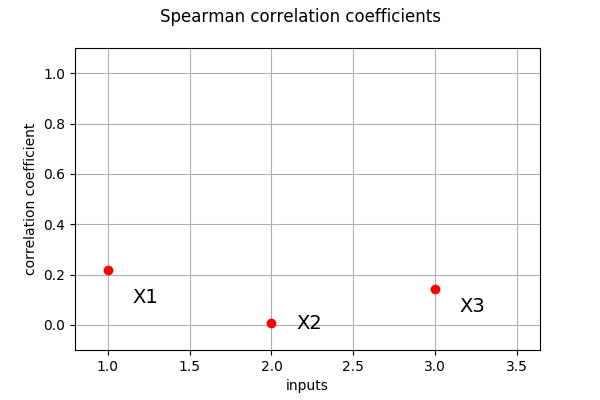

In [18]:
ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients(spearman_correlation, 
                                                     input_names, 
                                                     "Spearman correlation coefficients")